# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Webscraping Project 4 Lab

Week 4 | Day 4

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com (or other sites at your team's discretion). In the second part, the focus is on using listings with salary information to build a model and predict high or low salaries and what features are predictive of that result.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

In [1]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [4]:
import requests
import bs4
from bs4 import BeautifulSoup

In [8]:
## YOUR CODE HERE

r2 = requests.get('https://www.dice.com/jobs/jtype-Full%20Time-q-data_science-limit-30-l-New_York%2C_NY-radius-30-jobs.html?searchid=3891919361279')

soup = BeautifulSoup(r2.content, "lxml")

In [9]:
soup


<!DOCTYPE html>\n<html>\n<head>\n<meta charset="unicode-escape"/>\n<meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n<meta content="width=device-width, initial-scale=1" name="viewport"/>\n<meta content="Job_Search_Results" name="ompagename"/>\n<meta content="tech pro" name="channel"/>\n<title>Full-Time data science jobs in New York, NY | Dice.com</title>\n<meta content="2,963 Full-Time data science jobs in New York, NY on Dice.com. Find your next tech job." name="description"/>\n<meta content="Full-Time data science jobs in New York, NY, tech jobs, it jobs, recruitment,  careers,  employment,  job listings,  job search,  search engine, work in" name="keywords"/>\n<link href="https://www.dice.com/jobs/q-data_science-jtype-Full+Time-limit-30-l-New_York%2C_NY-radius-30-jobs.html" rel="canonical"/>\n<link href="https://www.dice.com/jobs/q-data_science-jtype-Full+Time-limit-30-l-New_York%2C_NY-radius-30-startPage-2-jobs.html" rel="next"/>\n<link href="//fonts.googleapis.com/css?family

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- Make sure these functions are robust and can handle cases where the data/field may not be available.
- Test the functions on the results above
- Include any other features you may want to use later (e.g. summary, #of reviews...)

In [10]:
print soup.prettify()


<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Job_Search_Results" name="ompagename"/>
  <meta content="tech pro" name="channel"/>
  <title>
   Full-Time data science jobs in New York, NY | Dice.com
  </title>
  <meta content="2,963 Full-Time data science jobs in New York, NY on Dice.com. Find your next tech job." name="description"/>
  <meta content="Full-Time data science jobs in New York, NY, tech jobs, it jobs, recruitment,  careers,  employment,  job listings,  job search,  search engine, work in" name="keywords"/>
  <link href="https://www.dice.com/jobs/q-data_science-jtype-Full+Time-limit-30-l-New_York%2C_NY-radius-30-jobs.html" rel="canonical"/>
  <link href="https://www.dice.com/jobs/q-data_science-jtype-Full+Time-limit-30-l-New_York%2C_NY-radius-30-startPage-2-jobs.html" rel="next"/>
  <link href="//fonts.googleapis.com/cs

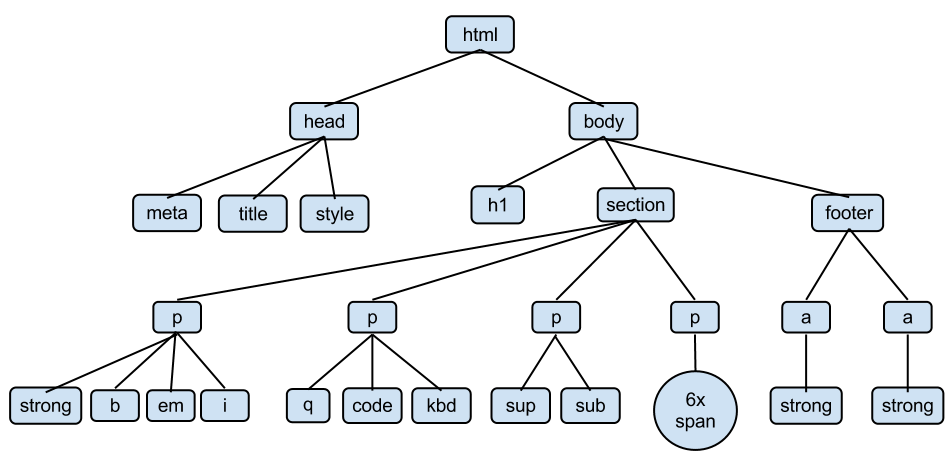

In [10]:
from IPython.display import Image
Image('http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png')

In [3]:
#find all the tags in our soup.
for tag in soup.find('h3'):
    print(tag.name)

NameError: name 'soup' is not defined

In [35]:
for links in soup.find_all('a'):
    print (links.get('href'))

http://www.dice.com
None
/jobs
/skills
https://www.dice.com/mobile
http://insights.dice.com/career-toolkit/
http://insights.dice.com/
http://www.dice.com/products/webstore
http://www.dice.com/products
/dashboard/login
http://www.dice.com/products/webstore
http://www.dice.com/products
/dashboard/login
#
https://www.dice.com/jobs/advancedSearch.html
https://www.dice.com/jobs/q-data_science-l-New_York%2C_NY-jtype-Full_Time-radius-30-jobs.html
https://www.dice.com/jobs/q-data_science-l-New_York%2C_NY-jtype-Part_Time-radius-30-jobs.html
https://www.dice.com/jobs/q-data_science-l-New_York%2C_NY-jtype-Contracts-radius-30-jobs.html
https://www.dice.com/jobs/q-data_science-l-New_York%2C_NY-jtype-Third_Party-radius-30-jobs.html
None
#
None
#
#
https://www.dice.com/jobs/q-data_science-l-New_York%2C_NY-dcs-Recruiter-jtype-Full_Time-radius-30-jobs.html
https://www.dice.com/jobs/q-data_science-l-New_York%2C_NY-dcs-DirectHire-jtype-Full_Time-radius-30-jobs.html
https://www.dice.com/jobs/q-data_scienc

In [36]:
soup.name

u'[document]'

In [37]:
soup.a.contents()

TypeError: 'list' object is not callable

In [1]:
"""from scrapy import Spider
from indeed.items import IndeedItem
from scrapy.selector import Selector
from selenium import webdriver
from scrapy.http import TextResponse
import scrapy


class IndeedSpider(Spider):
    name = 'indeed'

    allowed_domains = ["http://www.dice.com/"]

    s1 = 'https://www.dice.com/jobs/q-data_scientist-limit-30-l-New_York%2C_NY-radius-30-startPage-1-limit-30-jobs?searchid=291607343849'

    start_urls = [s1]

    def __init__(self):
        self.driver = webdriver.Chrome()

    def parse(self, response):

        self.driver.get(response.url)
        urls = []

        for i in range(1,20):
        
            response = TextResponse(url=self.driver.current_url, body=self.driver.page_source, encoding='utf-8')
            self.driver.implicitly_wait(10)

            for j in range(1, 31):
                result = response.xpath('//*[@class="col-md-9"]/div[1]/div['+str(j)+']/h3/a/@href')
                urls.extend(result)

            next_page = self.driver.find_element_by_xpath('//*[@title="Go to next page"]')
            next_page.click()"""

ImportError: No module named scrapy

In [ ]:
"""for href in urls:
            print href
            url = href.extract()
            self.driver.get(url)
            response = TextResponse(url=self.driver.current_url, body=self.driver.page_source, encoding='utf-8')
            item = IndeedItem()

            for sel in response.xpath('//div[@class="col-md-5 col-lg-6"]'):
                item['job_title'] = sel.xpath('//div[@class="col-md-5 col-lg-6"]/h1/text()').extract()
                item['location'] = sel.xpath('//div[@class="col-md-5 col-lg-6"]/ul/li[2]/text()').extract()
                item['company_name'] = sel.xpath('//div[@class="col-md-5 col-lg-6"]/ul/li[1]/a/text()').extract()

            for sel_1 in response.xpath('//*[@id="bd"]/div/div[1]'):
                item['job_type'] = sel_1.xpath('//div[2]/div/div[2]/span/text()').extract()
                item['job_salary'] = sel_1.xpath('//div[3]/div/div[2]/span/text()').extract()


            yield item


        self.driver.close()"""

In [ ]:
https://www.dice.com/jobs/detail/Data-Scientist-3%26%23474-NORTHROP-GRUMMAN-Redondo-Beach-CA-90277/ngitbot/16024151?icid=sr4-1p&q=data%20scientist&l=

In [11]:
r3 = requests.get('https://www.dice.com/jobs/detail/Data-Scientist-3%26%23474-NORTHROP-GRUMMAN-Redondo-Beach-CA-90277/ngitbot/16024151?icid=sr4-1p&q=data%20scientist&l=')

soup3 = BeautifulSoup(r2.content, "lxml")

In [12]:
soup3

<!DOCTYPE html>\n<html>\n<head>\n<meta charset="unicode-escape"/>\n<meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n<meta content="width=device-width, initial-scale=1" name="viewport"/>\n<meta content="Job_Search_Results" name="ompagename"/>\n<meta content="tech pro" name="channel"/>\n<title>Full-Time data science jobs in New York, NY | Dice.com</title>\n<meta content="2,963 Full-Time data science jobs in New York, NY on Dice.com. Find your next tech job." name="description"/>\n<meta content="Full-Time data science jobs in New York, NY, tech jobs, it jobs, recruitment,  careers,  employment,  job listings,  job search,  search engine, work in" name="keywords"/>\n<link href="https://www.dice.com/jobs/q-data_science-jtype-Full+Time-limit-30-l-New_York%2C_NY-radius-30-jobs.html" rel="canonical"/>\n<link href="https://www.dice.com/jobs/q-data_science-jtype-Full+Time-limit-30-l-New_York%2C_NY-radius-30-startPage-2-jobs.html" rel="next"/>\n<link href="//fonts.googleapis.com/css?family

In [14]:
print soup3.prettify()

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Job_Search_Results" name="ompagename"/>
  <meta content="tech pro" name="channel"/>
  <title>
   Full-Time data science jobs in New York, NY | Dice.com
  </title>
  <meta content="2,963 Full-Time data science jobs in New York, NY on Dice.com. Find your next tech job." name="description"/>
  <meta content="Full-Time data science jobs in New York, NY, tech jobs, it jobs, recruitment,  careers,  employment,  job listings,  job search,  search engine, work in" name="keywords"/>
  <link href="https://www.dice.com/jobs/q-data_science-jtype-Full+Time-limit-30-l-New_York%2C_NY-radius-30-jobs.html" rel="canonical"/>
  <link href="https://www.dice.com/jobs/q-data_science-jtype-Full+Time-limit-30-l-New_York%2C_NY-radius-30-startPage-2-jobs.html" rel="next"/>
  <link href="//fonts.googleapis.com/cs

In [ ]:
def get_description()

In [8]:
## YOUR CODE HERE
#i = 0
#for d in soup.findAll('div'):
    #print(i, d)
    #print('\n')
    #i += 1



def extract_location_from_result(result):
    i = 0
    for d in soup.findAll('div'):
    print(i, d)
    print('\n')
    i += 1
    
    #return result.find




IndentationError: expected an indented block (<ipython-input-8-eec1327019b2>, line 13)

In [ ]:
def extract_company_from_result(result):
    return result.find

In [ ]:
def extract_job_from_result(result):
    return result.find

In [ ]:
def extract_salary_from_result(result):
    return result.find

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Indeed.com only has salary information for an estimated 20% of job postings. You may want to add other cities to the list below to gather more data. 
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [6]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
max_results_per_city = 100

results = []

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Atlanta']):
    for start in range(0, max_results_per_city, 10):
        # Grab the results from the request (as above)
        # Append to the full set of results
        pass

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [7]:
## YOUR CODE HERE

Lastly, we need to clean up salary data. 
1. Some of the salaries are not yearly but hourly, these will be useful to us for now
2. The salaries are given as text and usually with ranges.

#### Filter out the salaries that are not yearly (filter those that refer to hour)

In [8]:
## YOUR CODE HERE

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [9]:
## YOUR CODE HERE

### Save your results as a CSV

In [14]:
## YOUR CODE HERE

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping & Logistic Regression

### Description

This week we're learning about web scraping and logistic regression. Let's put these skills to the test!

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal thinks the best way to gauge salary amounts is to take a look at what industry factors influence the pay scale for these professionals.

Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. Your job is to understand what factors most directly impact data science salaries and effectively, accurately find appropriate data science related jobs in your metro region.

#### Project Summary

In this project, we will practice two major skills. Collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title, and summary of the job, we will attempt to predict a corresponding salary for that job. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries for other listings will be extremely useful for negotiations :)

Normally we could use regression for this task; however, instead we will convert this into a classification problem and use Logistic Regression.

- **Question**: Why would we want this to be a classification problem?
- **Answer**: While more precision may be better, there is a fair amount of natural variance in job salaries; therefore, predicting a range (e.g. high or low) may be useful.

The first part of assignment will be focused on scraping data, and the second will be focused on using the listings with salary information to build a model and predict salaries.

Your job is to:

1. Collect data on data science salary trends from a job listings aggregator for your analysis.
  - Select and parse data from at least ~1000 postings for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (title, location, department, etc.). In this case, we do not want to predict mean salary as would be done in a regression. Your boss believes that salary is better represented in categories than continuously
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Prepare a presentation for your Principal detailing your analysis.

**BONUS PROBLEMS:**
1. Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your logistic regression models to ease her mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.
2. Text variables and regularization:
  - **Part 1**: Job descriptions contain more potentially useful information you could leverage. Use the job summary to find words you think would be important and add them as predictors to a model.
  - **Part 2**: Gridsearch parameters for Ridge and Lasso for this model and report the best model.


**Goal:** Scrape & clean data, run logistic regression, derive insights, present findings.

---

### Requirements

- Scrape and prepare your data using BeautifulSoup.
- A team Jupyter Notebook with your regression analysis for a peer audience of data scientists.
- An individual blog post describing your findings, with two sections: the first for a non-technical audience, and the second for data scientist peers.
- A five-minute in-class presentation, delivered as if you were presenting your findings to the principal who tasked you with this investigation.

Please submit a link to your GitHub project repo and blog posts by the start of class on Wednesday (10/19).

Presentations will be on Friday (10/21); there will be some in-class time on Thursday and Friday to prepare.

---

### Suggested Ways to Get Started

- Read the docs for whatever technologies you use. Most of the time, there is a tutorial that you can follow, but not always, and learning to read documentation is crucial to your success!
- Document **everything**.

### Additional Resources
- [Advice on How to Write for a Non-Technical Audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

[Attached here is a complete rubric for this project.](./project-04-rubric.md)

Your instructors will score each of your technical requirements using the scale below:

    Score | Expectations
    ----- | ------------
    **0** | _Incomplete._
    **1** | _Does not meet expectations._
    **2** | _Meets expectations, good job!_
    **3** | _Exceeds expectations, you wonderful creature, you!_

 This will serve as a helpful overall gauge of whether you met the project goals, but __the more important scores are the individual ones__ above, which can help you identify where to focus your efforts for the next project!
# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping & Logistic Regression

### Description

This week we're learning about web scraping and logistic regression. Let's put these skills to the test!

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal thinks the best way to gauge salary amounts is to take a look at what industry factors influence the pay scale for these professionals.

Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. Your job is to understand what factors most directly impact data science salaries and effectively, accurately find appropriate data science related jobs in your metro region.

#### Project Summary

In this project, we will practice two major skills. Collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title, and summary of the job, we will attempt to predict a corresponding salary for that job. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries for other listings will be extremely useful for negotiations :)

Normally we could use regression for this task; however, instead we will convert this into a classification problem and use Logistic Regression.

- **Question**: Why would we want this to be a classification problem?
- **Answer**: While more precision may be better, there is a fair amount of natural variance in job salaries; therefore, predicting a range (e.g. high or low) may be useful.

The first part of assignment will be focused on scraping data, and the second will be focused on using the listings with salary information to build a model and predict salaries.

Your job is to:

1. Collect data on data science salary trends from a job listings aggregator for your analysis.
  - Select and parse data from at least ~1000 postings for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (title, location, department, etc.). In this case, we do not want to predict mean salary as would be done in a regression. Your boss believes that salary is better represented in categories than continuously
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Prepare a presentation for your Principal detailing your analysis.

**BONUS PROBLEMS:**
1. Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your logistic regression models to ease her mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.
2. Text variables and regularization:
  - **Part 1**: Job descriptions contain more potentially useful information you could leverage. Use the job summary to find words you think would be important and add them as predictors to a model.
  - **Part 2**: Gridsearch parameters for Ridge and Lasso for this model and report the best model.


**Goal:** Scrape & clean data, run logistic regression, derive insights, present findings.

---

### Requirements

- Scrape and prepare your data using BeautifulSoup.
- A team Jupyter Notebook with your regression analysis for a peer audience of data scientists.
- An individual blog post describing your findings, with two sections: the first for a non-technical audience, and the second for data scientist peers.
- A five-minute in-class presentation, delivered as if you were presenting your findings to the principal who tasked you with this investigation.

Please submit a link to your GitHub project repo and blog posts by the start of class on Wednesday (10/19).

Presentations will be on Friday (10/21); there will be some in-class time on Thursday and Friday to prepare.

---

### Suggested Ways to Get Started

- Read the docs for whatever technologies you use. Most of the time, there is a tutorial that you can follow, but not always, and learning to read documentation is crucial to your success!
- Document **everything**.

### Additional Resources
- [Advice on How to Write for a Non-Technical Audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

[Attached here is a complete rubric for this project.](./project-04-rubric.md)

Your instructors will score each of your technical requirements using the scale below:

    Score | Expectations
    ----- | ------------
    **0** | _Incomplete._
    **1** | _Does not meet expectations._
    **2** | _Meets expectations, good job!_
    **3** | _Exceeds expectations, you wonderful creature, you!_
